### 오토인코더
**입력값과 출력값을 같게 하는 신경망**
- 가운데계층(은닉층)의 노드수가 입력값보다 적다
 <br/>→ 입력 데이터를 압축하는 효과를 얻게 됨 / 노이즈 제거 효과적
- 입력층으로 들어온 데이터를 인코더 통해 은닉층으로 내보내고, <br/>은닉층의 데이터를 디코더 통해 출력층으로 내보낸 뒤, <br/>만들어진 출력값을 입력값과 비슷하도록 만드는 가중치 찾아냄

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


In [2]:
learning_rate = 0.01
training_epoch = 20
batch_size = 100
n_hidden = 256
n_input = 28*28

In [3]:
X = tf.placeholder(tf.float32, [None, n_input])
# 비지도학습이므로 Y 없음

In [4]:
# 인코더
W_encode = tf.Variable(tf.random_normal([n_input, n_hidden]))
b_encode = tf.Variable(tf.random_normal([n_hidden]))
encoder = tf.nn.sigmoid(tf.add(tf.matmul(X, W_encode), b_encode))

In [5]:
# 디코더
W_decode = tf.Variable(tf.random_normal([n_hidden, n_input]))
b_decode = tf.Variable(tf.random_normal([n_input]))
decoder = tf.nn.sigmoid(tf.add(tf.matmul(encoder, W_decode), b_decode))

In [6]:
# 손실함수 
# 입력값인 X를 평가하기 위한 실측값으로 사용, 디코더가 내보낸 결과값과의 차이를 손실값으로 설정
cost = tf.reduce_mean(tf.pow(X-decoder, 2))

In [7]:
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

In [8]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

total_batch = int(mnist.train.num_examples/batch_size)

for epoch in range(training_epoch):
    total_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs})
        total_cost += cost_val

    print('Epoch:', '%04d' % (epoch + 1), 'Avg. cost =', '{:.4f}'.format(total_cost / total_batch))

print('최적화 완료!')

Epoch: 0001 Avg. cost = 0.1950
Epoch: 0002 Avg. cost = 0.0613
Epoch: 0003 Avg. cost = 0.0501
Epoch: 0004 Avg. cost = 0.0410
Epoch: 0005 Avg. cost = 0.0386
Epoch: 0006 Avg. cost = 0.0361
Epoch: 0007 Avg. cost = 0.0352
Epoch: 0008 Avg. cost = 0.0342
Epoch: 0009 Avg. cost = 0.0337
Epoch: 0010 Avg. cost = 0.0329
Epoch: 0011 Avg. cost = 0.0312
Epoch: 0012 Avg. cost = 0.0297
Epoch: 0013 Avg. cost = 0.0287
Epoch: 0014 Avg. cost = 0.0284
Epoch: 0015 Avg. cost = 0.0281
Epoch: 0016 Avg. cost = 0.0277
Epoch: 0017 Avg. cost = 0.0275
Epoch: 0018 Avg. cost = 0.0261
Epoch: 0019 Avg. cost = 0.0259
Epoch: 0020 Avg. cost = 0.0257
최적화 완료!


In [9]:
# 10개의 테스트 데이터 가져와 디코더를 이용해 출력값 만듦
sample_size = 10
samples = sess.run(decoder, feed_dict={X: mnist.test.images[:sample_size]})

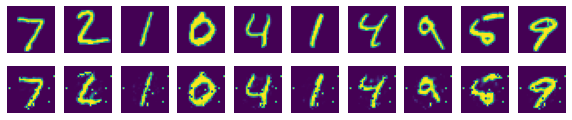

In [10]:
# 위쪽에는 입력값의 이미지, 아래쪽에는 신경망으로 생성한 이미지(출력값) 
fig, ax = plt.subplots(2, sample_size, figsize=(sample_size, 2))

for i in range(sample_size):
    ax[0][i].set_axis_off()
    ax[1][i].set_axis_off()
    ax[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    ax[1][i].imshow(np.reshape(samples[i], (28, 28)))

plt.show()